## ML Project
# Predicting Star Type


In [1]:
# Required imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
# Getting CSV Dataset

df=pd.read_csv('6 class csv.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [3]:
# Replacing different case formats with a specific case.

df.replace('Blue White', 'BLUE WHITE', inplace = True)
df.replace('Blue white', 'BLUE WHITE', inplace = True)
df.replace('Blue-white', 'BLUE WHITE', inplace = True)
df.replace('Blue white ', 'BLUE WHITE', inplace = True)
df.replace('Blue-White', 'BLUE WHITE', inplace = True)

df.replace('White', 'WHITE', inplace = True)
df.replace('white', 'WHITE', inplace = True)

df.replace('Yellowish', 'YELLOWISH', inplace = True)
df.replace('yellowish', 'YELLOWISH', inplace = True)

df.replace('Blue ', 'Blue', inplace = True)

df.replace('yellowish-white', 'Yellowish White', inplace = True)
df.replace('yellow-white', 'Yellowish White', inplace = True)





In [4]:
df['Spectral Class'].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [5]:
aa=df['Spectral Class'].unique()

In [6]:
# Label Encoding the 'Spectral Class' column and adding it to dataset

data = df['Spectral Class']
values = list(data)
#print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
#print(integer_encoded)

df['Class(int)'] = integer_encoded 



In [7]:
# Getting values for the label encoded in a dictionary

di={}
aa=df['Spectral Class'].unique()
cc=list(df['Class(int)'].unique())
#print(aa,cc)
for i in range(len(aa)):
    di[aa[i]]=cc[i]
print(di)

{'M': 5, 'B': 1, 'A': 0, 'F': 2, 'O': 6, 'K': 4, 'G': 3}


In [8]:
# Label Encoding the 'Star color' column and adding it to dataset

data = df['Star color']
values = list(data)
#print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
#print(integer_encoded)
df['Color(int)'] = integer_encoded 

In [9]:
a=df['Star color'].unique()
c=list(df['Color(int)'].unique())


In [10]:
# Getting values for the label encoded in a dictionary

dic={}
label_encoder.transform(a)
b=list(label_encoder.inverse_transform(c))
#print(b)
for i in range(len(a)):
    dic[b[i]]=c[i]
#b-string     c-number

In [11]:
# Sorting the value items in dictionary

li=list(sorted(dic.items(), key = lambda kv:(kv[1], kv[0])))

In [12]:
df.drop(['Star color'], axis=1)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Spectral Class,Class(int),Color(int)
0,3068,0.002400,0.1700,16.12,0,M,5,5
1,3042,0.000500,0.1542,16.60,0,M,5,5
2,2600,0.000300,0.1020,18.70,0,M,5,5
3,2800,0.000200,0.1600,16.65,0,M,5,5
4,1939,0.000138,0.1030,20.06,0,M,5,5
...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,O,6,1
236,30839,834042.000000,1194.0000,-10.63,5,O,6,1
237,8829,537493.000000,1423.0000,-10.73,5,A,0,6
238,9235,404940.000000,1112.0000,-11.23,5,A,0,6


In [13]:
# Defining X and Y parameters

X=df[['Temperature (K)','Luminosity(L/Lo)','Radius(R/Ro)','Absolute magnitude(Mv)','Color(int)','Class(int)']]
y=df['Star type']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [15]:
def classifieralgo(X,y,model):
    scalar=StandardScaler()
    X=scalar.fit_transform(X)
    xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=0,test_size=0.2)
    model.fit(xtrain,ytrain)
    cm=confusion_matrix(ytest,model.predict(xtest))
    sc=model.score(xtest,ytest)*100
    return sc
    
    
    

In [20]:
lis=[LogisticRegression(),KNeighborsClassifier(),SVC(),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier()]

In [21]:
scores=[]
for i in lis:
    scores.append(classifieralgo(X,y,i))

In [22]:
#scores

Text(0.5, 1.0, '*COMPARISON*')

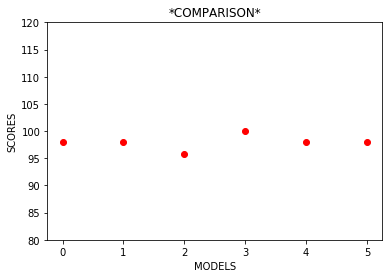

In [23]:
# Graphical representation

plt.plot(scores,'ro')
plt.ylim(80,120)
plt.xlabel("MODELS")
plt.ylabel("SCORES")
plt.title("*COMPARISON*")

In [25]:
# Taking Input

print("ENTER TEMPERATURE IN RANGE: 1939 - 40000")
t=int(input("Temperature (K)"))
print("ENTER LUMINOSITY IN RANGE: 8e-05 - 849420.0")
l=float(input('Luminosity(L/Lo)'))
print("ENTER RADIUS IN RANGE: 0.0084 - 1948.5")
r=float(input('Radius(R/Ro)'))
print("ENTER ABSOLUTE MAGNITUDE IN RANGE: -11.92 - 20.06")
m=float(input('Absolute magnitude(Mv)'))
print("ENTER SPECTRAL RANGE IN RANGE: 0 - 5")
s=int(input('Spectral range'))
print("ENTER STAR COLOR'S NUMBER FROM: ",li)
c=int(input('Star Color'))

ENTER TEMPERATURE IN RANGE: 1939 - 40000


Temperature (K) 34000


ENTER LUMINOSITY IN RANGE: 8e-05 - 849420.0


Luminosity(L/Lo) 10000


ENTER RADIUS IN RANGE: 0.0084 - 1948.5


Radius(R/Ro) 3455


ENTER ABSOLUTE MAGNITUDE IN RANGE: -11.92 - 20.06


Absolute magnitude(Mv) 10


ENTER SPECTRAL RANGE IN RANGE: 0 - 5


Spectral range 2


ENTER STAR COLOR'S NUMBER FROM:  [('BLUE WHITE', 0), ('Blue', 1), ('Orange', 2), ('Orange-Red', 3), ('Pale yellow orange', 4), ('Red', 5), ('WHITE', 6), ('White-Yellow', 7), ('Whitish', 8), ('YELLOWISH', 9), ('Yellowish White', 10)]


Star Color 5


In [26]:
inp=[[t,l,r,m,s,c]]


In [27]:
# Fitting data
model = GaussianNB()
model.fit(X, y)


GaussianNB(priors=None, var_smoothing=1e-09)

In [28]:
# define one new instance
Xnew = list(inp)

In [32]:
# make a prediction
ynew = int(model.predict(Xnew))
#print(ynew)
#print(di)

In [33]:
stype={0:'Brown Dwarf',1:'Red Dwarf',2:'White Dwarf',3:'Main Sequence',4:'Supergiant',5:'Hypergiant'}

In [34]:
# Getting the result
'''
Brown Dwarf -> Star Type = 0

Red Dwarf -> Star Type = 1

White Dwarf-> Star Type = 2

Main Sequence -> Star Type = 3

Supergiant -> Star Type = 4

Hypergiant -> Star Type = 5
'''

print("STAR TYPE IS :",ynew,",that is",stype.get(ynew),end='.')

STAR TYPE IS : 5 ,that is Hypergiant.